### Импорты используемых библиотек:

In [101]:
import os
import re
import umap
import pymorphy2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

ModuleNotFoundError: No module named 'keras'

Получаем список имен президентов и содержимое файлов датасета:

In [6]:
path = "../data/addresses/"

In [7]:
presidents = []
contents = []

In [8]:
for _, _, files in os.walk(path):
   for name in files:
      presidents.append(' '.join(name.split()[:2]))
        
      with open(path + name, 'r') as file:
          contents.append(file.read())

In [12]:
presidents

['Abraham Lincoln',
 'Abraham Lincoln',
 'Abraham Lincoln',
 'Abraham Lincoln',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Jackson',
 'Andrew Johnson',
 'Andrew Johnson',
 'Andrew Johnson',
 'Andrew Johnson',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Barack Obama',
 'Benjamin Harrison',
 'Benjamin Harrison',
 'Benjamin Harrison',
 'Benjamin Harrison',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Calvin Coolidge',
 'Chester A.',
 'Chester A.',
 'Chester A.',
 'Chester A.',
 'Donald J.',
 'Donald J.',
 'Donald J.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Dwight D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Franklin D.',
 'Fran

In [10]:
for text in contents:
    print(text.split()[:10])

ens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'After', 'a']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'The', 'continued']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'To', 'express']
['Fellow-Citizens', 'of', 'the', 'Senate', 'and', 'House', 'of', 'Representatives:', 'Upon', 'the']
['Please,', 'everybody,', 'have', 'a', 'seat.', 'Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,']
['Madam', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,', 'the', 'First']
['Thank', 'you.', 'Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,']
['The', 'President.', 'Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,']
['Mr.', 'Speaker,', 'Mr.', 'Vice', 'President,', 'Members', 'of', 'Congress,', 'distinguished', 'guests,']
['Mr.', 'Speaker,', 'Mr.', 'Vice',

In [13]:
texts = pd.DataFrame({"President": presidents, "Text": contents})

In [14]:
texts

,President,Text
0,Abraham Lincoln,\n Fellow-Citizens of the Senate and House of ...
1,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
2,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
3,Abraham Lincoln,\nFellow-Citizens of the Senate and House of R...
4,Andrew Jackson,\nFellow Citizens of the Senate and of the Hou...
...,...,...
219,Woodrow Wilson,\nGentlemen of the Congress:\nIn fulfilling at...
220,Woodrow Wilson,\nGENTLEMEN OF THE CONGRESS:\nSince I last had...
221,Woodrow Wilson,\nGENTLEMEN OF THE CONGRESS:\nWhen I addressed...
222,Woodrow Wilson,\nGentlemen of the Congress:\nThe session upon...


,Text
President,
Abraham Lincoln,4
Andrew Jackson,8
Andrew Johnson,4
Barack Obama,8
Benjamin Harrison,4
Calvin Coolidge,6
Chester A.,4
Donald J.,3
Dwight D.,8


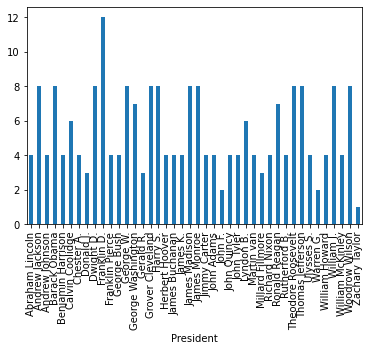

In [15]:
summary = texts.groupby("President").count()
ax = summary.plot.bar(y='Text')
ax.get_legend().remove()
summary

Разобьем текст на слова:

In [50]:
words = []

for text in texts.Text:
    words += re.findall('[A-Za-zА-ЯЁа-яё]+-[A-Za-zА-ЯЁа-яё]+|[A-Za-zА-ЯЁа-яё]+', text)

print(f"Total words: {len(words)}")
print(f"Unique words: {len(set(words))}")

Total words: 1893596
Unique words: 31019


In [17]:
counter=CountVectorizer(token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
res=counter.fit_transform(texts.Text.tolist())

print(counter.vocabulary_)

related': 21521, 'untapped': 24845, 'stave': 22076, 'bug': 2967, 'headache': 10620, 'tames': 23002, 'engulfed': 7760, 'serbian': 20863, 'kosovo': 13037, 'wye': 26107, 'ladin': 13084, 'kenya': 12932, 'jeff': 12705, 'taliaferro': 22987, 'dominicans': 7001, 'sammy': 20279, 'sosa': 21670, 'felons': 8856, 'stalkers': 21976, 'crime-mapping': 5339, 'mug': 15013, 'juveniles': 12883, 'horrified': 11019, 'heartbroken': 10656, 'jonesboro': 12781, 'paducah': 16425, 'edinboro': 7333, 'suzann': 22831, 'passionately': 16635, 'canyons': 3223, 'warming': 25470, 'hint': 10858, 'livability': 13603, 'tutor': 24101, 'fema': 8859, 'rosa': 20067, 'ancestry': 990, 'gender': 9837, 'counts': 5209, 'energizing': 7713, 'mayflower': 14279, 'harriet': 10549, 'tubman': 24056, 'star-spangled': 22010, 'wondered': 25945, 'hopefulness': 10997, 'mountaintop': 14973, 'synagogues': 22912, 'cd': 3403, 'v-chip': 25006, 'censorship': 3438, 'upbringing': 24898, 'vchip': 25090, 'superhighway': 22657, 'designer': 6212, 'jackets'

In [20]:
morph=pymorphy2.MorphAnalyzer()

Функция для построения словаря всех слов текста, приведенных к начальной форме:

In [ ]:
def normalize(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []

    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form)

    return words

In [18]:
fit = umap.UMAP(
    n_neighbors=4,
    min_dist=0.01,
    n_components=2,
    metric="euclidean",
    random_state=42
)
    
result = fit.fit_transform(data)

NameError: name 'data' is not defined

In [39]:
train_x = np.array([' '.join(normalize(text)) for text in texts.Text])

In [79]:
presidents = list(texts.groupby("President").indices.keys())
presidents_map = {presidents[i]:i for i in range(len(presidents))}

In [83]:
train_y = []
for president in texts.President:
    train_y.append(presidents_map[president])

In [85]:
tf_counter=TfidfVectorizer(ngram_range=(1,2), token_pattern=r'[А-Яа-яЁё]+\-[А-Яа-яЁё]+|[А-Яа-яЁё]+')
train_tf_x = tf_counter.fit_transform(train_x)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

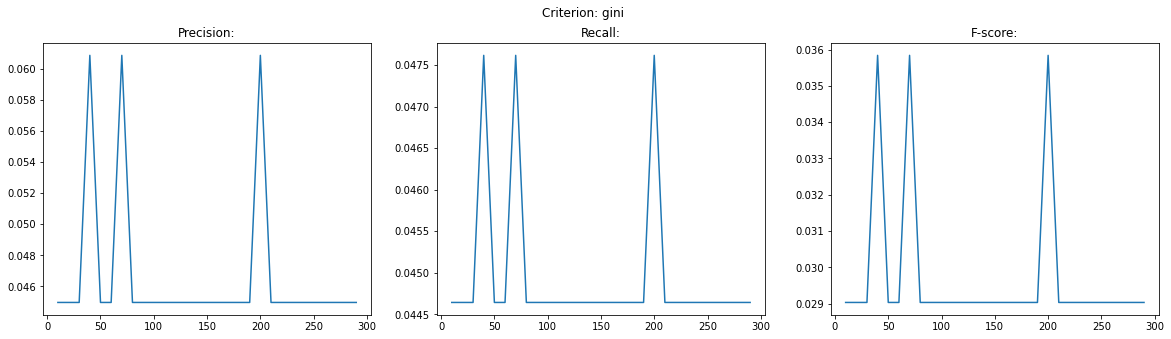

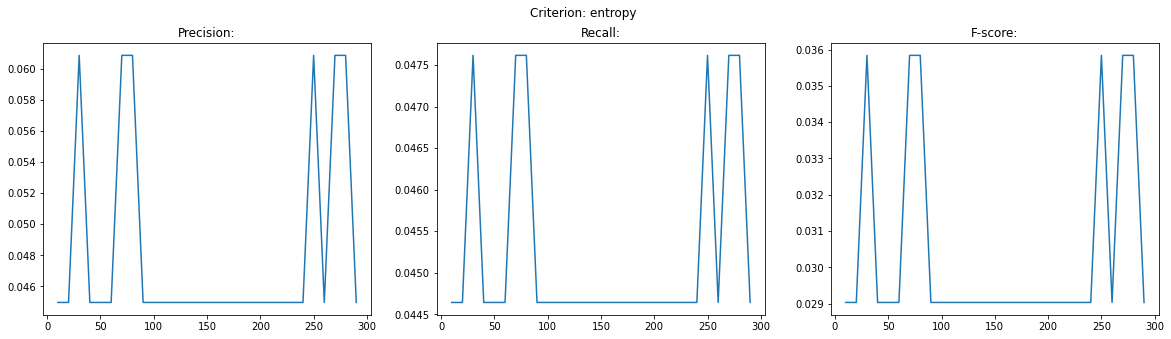

In [98]:
def calc_metrics_for_forest(crit):
    prec=[]
    rec = []
    fs = []
    d_range = range(10, 300, 10)

    for d in d_range:
        knn = RandomForestClassifier(criterion=crit, max_depth=d)
        knn.fit(train_tf_x, train_y)
        result = knn.predict(train_tf_x).tolist()
        metrics = precision_recall_fscore_support(train_y, result)
    
        prec.append(np.average(metrics[0]))
        rec.append(np.average(metrics[1]))
        fs.append(np.average(metrics[2]))

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    ax[0].plot(d_range, prec)
    ax[1].plot(d_range, rec)
    ax[2].plot(d_range, fs)

    ax[0].set_title("Precision:")
    ax[1].set_title("Recall:")
    ax[2].set_title("F-score:")

    fig.suptitle("Сriterion: " + crit)

calc_metrics_for_forest("gini")
calc_metrics_for_forest("entropy")

In [92]:
rfc = RandomForestClassifier(criterion='gini', max_depth=30)
rfc.fit(train_tf_x, train_y)

RandomForestClassifier(max_depth=30)

In [93]:
test_y_hat = rfc.predict(train_tf_x)
list(zip(train_tf_x, train_y))

 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  9),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  10),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  10),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  10),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  10),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  11),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  11),
 (<1x6 sparse matrix of type '<class 'numpy.float64'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  11),
 (<1x6 sparse matrix of type '<